In [53]:
# download data
!gdown --id "17NZ6nFULPxKxngb3mpnLohcAA0QsiG1I"

import zipfile, os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

local_zip = '/content/data_submission.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp/images')
zip_ref.close()

base_dir = '/tmp/images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

# menampung nilai direktori data train paper
train_paper_dir = os.path.join(base_dir, 'paper')

# menampung nilai direktori data train rock
train_rock_dir = os.path.join(base_dir, 'rock')

# menampung nilai direktori data train scissors
train_scissors_dir = os.path.join(base_dir, 'scissors')

# menampung nilai direktori data validasi paper
validation_paper_dir = os.path.join(base_dir, 'paper')

# menampung nilai direktori data validasi rock
validation_rock_dir = os.path.join(base_dir, 'rock')

# menampung nilai direktori data validasi scissors
validation_scissors_dir = os.path.join(base_dir, 'scissors')

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150), # mengubah resolusi 150x150 pixel
    batch_size=4,
    class_mode='categorical' # categorical untuk klasifikasi data lebih dari 2 class
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=4,
    class_mode='categorical'
)

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), input_shape=(150, 150, 3)),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    tf.keras.layers.Conv2D(32, (3, 3)),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3)),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3),
    tf.keras.layers.Activation('softmax')
])

model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.optimizers.Adam(),
    metrics=['accuracy']
)

# melatih model dengan fit
model.fit(
      train_generator,
      steps_per_epoch=100, # mengatur batch yang akan dieksekusi setiap epoch
      epochs=50,
      validation_data=validation_generator, # menampilkan akurasi pengujian dan validasi
      validation_steps=100,
      verbose=2
)

Downloading...
From: https://drive.google.com/uc?id=17NZ6nFULPxKxngb3mpnLohcAA0QsiG1I
To: /content/data_submission.zip
159MB [00:01, 136MB/s]
Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.
Epoch 1/50
100/100 - 20s - loss: 1.1199 - accuracy: 0.3618 - val_loss: 1.0783 - val_accuracy: 0.5975
Epoch 2/50
100/100 - 19s - loss: 1.0215 - accuracy: 0.4600 - val_loss: 0.9362 - val_accuracy: 0.4750
Epoch 3/50
100/100 - 20s - loss: 0.9112 - accuracy: 0.5725 - val_loss: 0.6243 - val_accuracy: 0.7825
Epoch 4/50
100/100 - 20s - loss: 0.7007 - accuracy: 0.7025 - val_loss: 0.4140 - val_accuracy: 0.8300
Epoch 5/50
100/100 - 19s - loss: 0.5516 - accuracy: 0.7875 - val_loss: 0.4061 - val_accuracy: 0.8525
Epoch 6/50
100/100 - 20s - loss: 0.4860 - accuracy: 0.8015 - val_loss: 0.3608 - val_accuracy: 0.8950
Epoch 7/50
100/100 - 19s - loss: 0.4942 - accuracy: 0.8025 - val_loss: 0.3884 - val_accuracy: 0.8400
Epoch 8/50
100/100 - 19s - loss: 0.5174 - accuracy: 0.8225 - val_los

Saving 2tRxoWcFfrvjsHTZ.png to 2tRxoWcFfrvjsHTZ (6).png
Saving 2affjOmZChc9AXpR.png to 2affjOmZChc9AXpR (6).png
Saving 1jHtb93pI8f6pfKo.png to 1jHtb93pI8f6pfKo (6).png


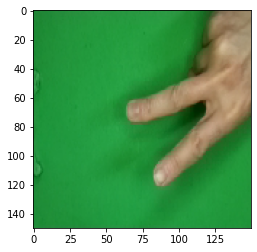

scissor


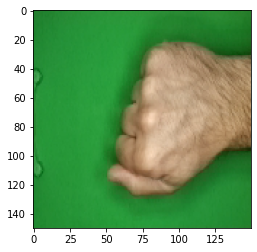

rock


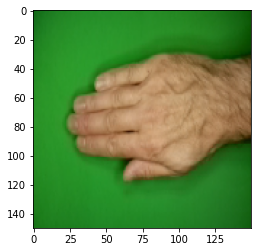

paper


In [66]:
%matplotlib inline
from google.colab import files
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting image
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  plt.imshow(img)
  plt.show()
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  for i in range(0,3):
    if(classes[0][i] == 1):
      if(i == 0):
        print('paper')
      elif(i == 1):
        print('rock')
      elif(i == 2):
        print('scissor')
      else: 
        print('error prediction')

